In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('dataset_harga_rumah.csv')
data.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga
0,Owner,0.0,0,2.0,tipe_a,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0.0,0,2.0,tipe_a,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0.0,0,2.0,tipe_a,933.1597222,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0.0,1,2.0,tipe_a,929.9211427,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1.0,0,2.0,tipe_a,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diposting_oleh        29451 non-null  object 
 1   sedang_pembangunan    27476 non-null  float64
 2   disetujui_pemerintah  29451 non-null  int64  
 3   total_ruangan         28071 non-null  float64
 4   tipe_a_atau_b         29451 non-null  object 
 5   kaki_persegi          27765 non-null  object 
 6   siap_pindah           29451 non-null  object 
 7   dijual_kembali        29451 non-null  object 
 8   alamat                27436 non-null  object 
 9   longitude             29451 non-null  float64
 10  latitude              26008 non-null  float64
 11  harga                 29451 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.7+ MB


In [5]:
data.describe()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,longitude,latitude,harga
count,27476.000000,29451.000000,28071.000000,29451.000000,26008.000000,29451.000000
mean,0.179684,0.317918,2.392220,21.300255,76.820157,142.898746
std,0.383931,0.465675,0.882229,6.205306,10.697823,656.880713
min,0.000000,0.000000,1.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,20.750000,77.326330,62.000000
75%,0.000000,1.000000,3.000000,26.900926,77.943705,100.000000
max,1.000000,1.000000,20.000000,59.912884,152.962676,30000.000000


In [6]:
# Terlihat bahwa longitude memiliki nilai -37 sampai 59 sedangkan latitude memiliki nilai -121 sampai 152
# Berdasarkan data yang didapat dari google, India memiliki latitude 8°4'N and 37°6'N and longitudes 68°7'E and 97°25'E.
# Oleh karena itu, latitude dan longitude perlu ditukar

data['latitude'], data['longitude'] = data['longitude'], data['latitude']

In [7]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [8]:
cek_null(data)

                    Total   Percent
total_ruangan        1380  0.046857
kaki_persegi         1686  0.057248
sedang_pembangunan   1975  0.067061
alamat               2015  0.068419
longitude            3443  0.116906


In [9]:
for i in data:
    display(f"{i}: {data[i].unique()}")

"diposting_oleh: ['Owner' 'Dealer' 'Builder']"

'sedang_pembangunan: [ 0.  1. nan]'

'disetujui_pemerintah: [0 1]'

'total_ruangan: [ 2.  3.  1.  4.  5.  6. nan 12.  8. 20. 10.  7.  9. 13. 17. 15. 11.]'

"tipe_a_atau_b: ['tipe_a' 'tipe_b']"

"kaki_persegi: ['1300.236407' '1275.0' '933.1597222' ... '1022.641509' '927.0790093'\n '896.7741935']"

"siap_pindah: ['1' '0' 'testes' 'a' 'awa' '1-1-1-' 'benar' 'salah' 'asik']"

"dijual_kembali: ['1' '0' 'Aku paling benar' 'SALAH' 'Semangat Dek']"

"alamat: ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'\n ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'\n 'E3-108, Lake View Recidency,,Vapi']"

'longitude: [ 77.59796   76.644605  77.632191 ...  73.3321    76.841908 -86.150721]'

'latitude: [12.96991  12.274538 12.778033 ... 18.9737   17.357159 39.945409]'

'harga: [  55.    51.    43.  ... 1170.  8660.    18.3]'

In [10]:
data['kaki_persegi'].mask(data['kaki_persegi'].isin(['1-1-1-', 'a', 'asik', 'awa', 'benar', 'salah', 'testes']), None, inplace=True)
data['siap_pindah'].mask(data['siap_pindah'].isin(['testes', 'a', 'awa', '1-1-1-', 'benar', 'salah', 'asik']), None, inplace=True)
data['dijual_kembali'].mask(data['dijual_kembali'].isin(['Aku paling benar', 'SALAH', 'Semangat Dek']), None, inplace=True)


In [11]:
for i in ['total_ruangan', 'kaki_persegi', 'longitude']:
    data[i].fillna(data[i].median(), inplace=True)

In [12]:
for i in ['siap_pindah', 'dijual_kembali', 'sedang_pembangunan']:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [13]:
cek_null(data)

        Total   Percent
alamat   2015  0.068419


In [14]:
for i in ['sedang_pembangunan', 'total_ruangan', 'siap_pindah', 'dijual_kembali']:
    data[i] = data[i].astype(np.int64)

data['kaki_persegi'] = data['kaki_persegi'].astype(np.float64)

In [15]:
data['tipe_a_atau_b'].mask(data['total_ruangan'] == 3, 'tipe_a', inplace=True)
data['tipe_a_atau_b'].mask(data['total_ruangan'] == 2, 'tipe_b', inplace=True)
data['tipe_a_atau_b'].mask(~data['total_ruangan'].isin([2, 3]), 'selain tipe_a dan tipe_b', inplace=True)

In [16]:
data['tipe_a_atau_b'].value_counts()

tipe_b                      14071
tipe_a                      10052
selain tipe_a dan tipe_b     5328
Name: tipe_a_atau_b, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diposting_oleh        29451 non-null  object 
 1   sedang_pembangunan    29451 non-null  int64  
 2   disetujui_pemerintah  29451 non-null  int64  
 3   total_ruangan         29451 non-null  int64  
 4   tipe_a_atau_b         29451 non-null  object 
 5   kaki_persegi          29451 non-null  float64
 6   siap_pindah           29451 non-null  int64  
 7   dijual_kembali        29451 non-null  int64  
 8   alamat                27436 non-null  object 
 9   longitude             29451 non-null  float64
 10  latitude              29451 non-null  float64
 11  harga                 29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data['harga_per_kaki_persegi'] = data.apply(lambda row: row['harga'] / row['kaki_persegi'], axis=1)

In [20]:
data['harga_per_ruang'] = data.apply(lambda row: row['harga'] / row['total_ruangan'], axis=1)

In [21]:
data.describe()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,kaki_persegi,siap_pindah,dijual_kembali,longitude,latitude,harga,harga_per_kaki_persegi,harga_per_ruang
count,29218.000000,29218.000000,29218.000000,2.921800e+04,29218.000000,29218.000000,29218.000000,29218.000000,29218.000000,29218.000000,29218.000000
mean,0.167636,0.317133,2.373058,1.116982e+04,0.840167,0.938942,76.876540,21.280966,142.569627,0.080909,58.655177
std,0.373549,0.465368,0.866162,1.194365e+06,0.366457,0.239441,10.032392,6.199933,655.249498,0.251097,297.977867
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-121.761248,-37.713008,0.250000,0.000010,0.083333
25%,0.000000,0.000000,2.000000,9.321188e+02,1.000000,1.000000,73.929052,18.452663,38.000000,0.035210,17.900000
50%,0.000000,0.000000,2.000000,1.176471e+03,1.000000,1.000000,77.326330,20.742166,61.900000,0.051000,27.333333
75%,0.000000,1.000000,3.000000,1.500000e+03,1.000000,1.000000,77.700000,26.895619,100.000000,0.081125,46.666667
max,1.000000,1.000000,20.000000,1.875000e+08,1.000000,1.000000,152.962676,59.912884,30000.000000,23.800000,12500.000000


In [22]:
Q1 = data['harga_per_kaki_persegi'].quantile(0.25)
Q3 = data['harga_per_kaki_persegi'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
data = data[~((data['harga_per_kaki_persegi'] < (Q1 - 1.5 * IQR)) | (data['harga_per_kaki_persegi'] > (Q3 + 1.5 * IQR)))]
data.shape

(26251, 14)

In [24]:
Q1 = data['harga_per_ruang'].quantile(0.25)
Q3 = data['harga_per_ruang'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
data = data[~((data['harga_per_ruang'] < (Q1 - 1.5 * IQR)) | (data['harga_per_ruang'] > (Q3 + 1.5 * IQR)))]
data.shape

(24934, 14)

In [26]:
Q1 = data['kaki_persegi'].quantile(0.25)
Q3 = data['kaki_persegi'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
data = data[~((data['kaki_persegi'] < (Q1 - 1.5 * IQR)) | (data['kaki_persegi'] > (Q3 + 1.5 * IQR)))]
data.shape

(23735, 14)

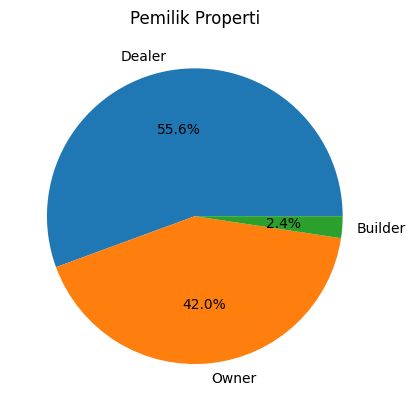

In [28]:
plt.pie(data['diposting_oleh'].value_counts(), labels=['Dealer', 'Owner', 'Builder'], autopct="%1.1f%%")
plt.title('Pemilik Properti')
plt.show()

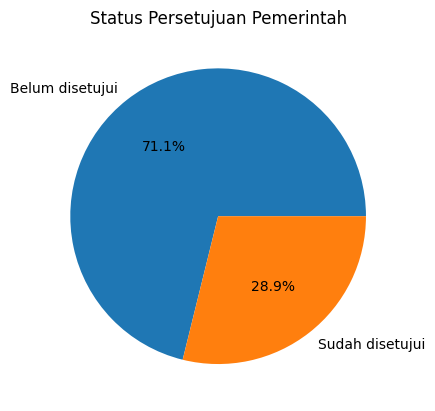

In [29]:
plt.pie(data['disetujui_pemerintah'].value_counts(), labels=['Belum disetujui', 'Sudah disetujui'], autopct="%1.1f%%")
plt.title('Status Persetujuan Pemerintah')
plt.show()

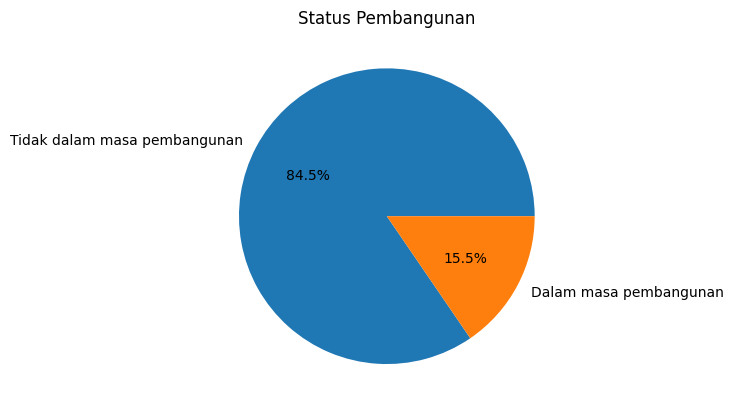

In [30]:
plt.pie(data['sedang_pembangunan'].value_counts(), labels=['Tidak dalam masa pembangunan', 'Dalam masa pembangunan'], autopct="%1.1f%%")
plt.title('Status Pembangunan')
plt.show()

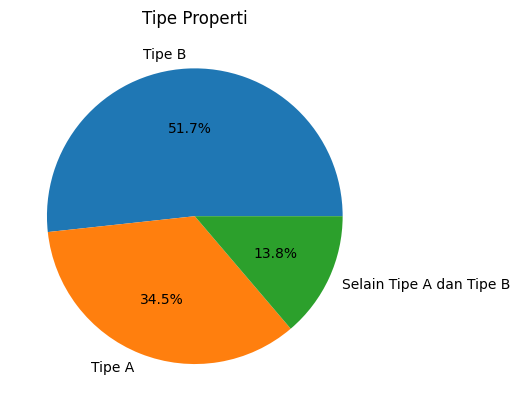

In [31]:
plt.pie(data['tipe_a_atau_b'].value_counts(), labels=['Tipe B', 'Tipe A', 'Selain Tipe A dan Tipe B'], autopct="%1.1f%%")
plt.title('Tipe Properti')
plt.show()

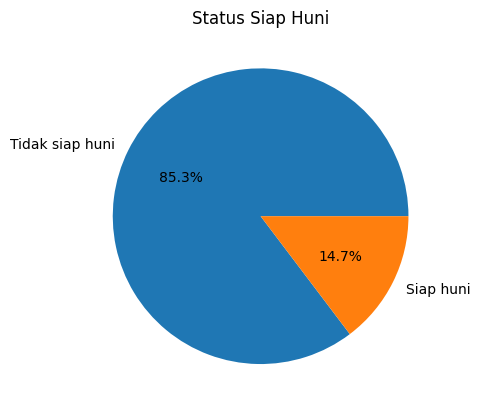

In [32]:
plt.pie(data['siap_pindah'].value_counts(), labels=['Tidak siap huni', 'Siap huni'], autopct="%1.1f%%")
plt.title('Status Siap Huni')
plt.show()

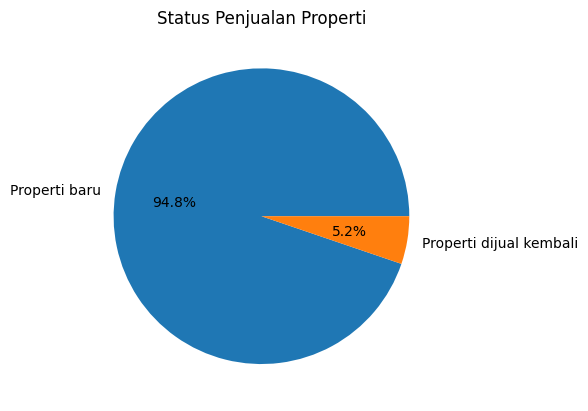

In [33]:
plt.pie(data['dijual_kembali'].value_counts(), labels=['Properti baru', 'Properti dijual kembali'], autopct="%1.1f%%")
plt.title('Status Penjualan Properti')
plt.show()

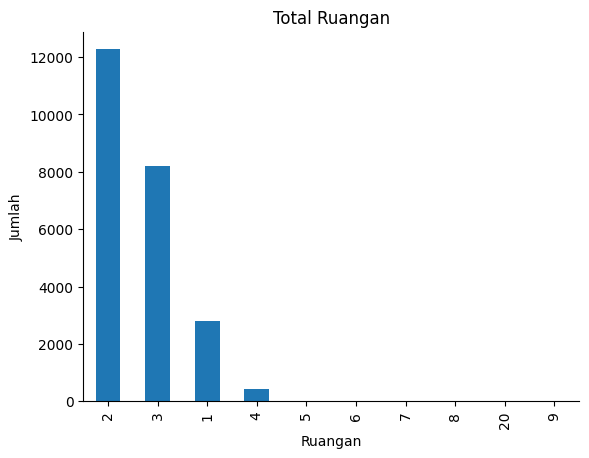

In [34]:
data['total_ruangan'].value_counts().plot(kind='bar')
plt.title('Total Ruangan')
plt.xlabel('Ruangan')
plt.ylabel('Jumlah')
sns.despine()

<Figure size 2000x2000 with 0 Axes>

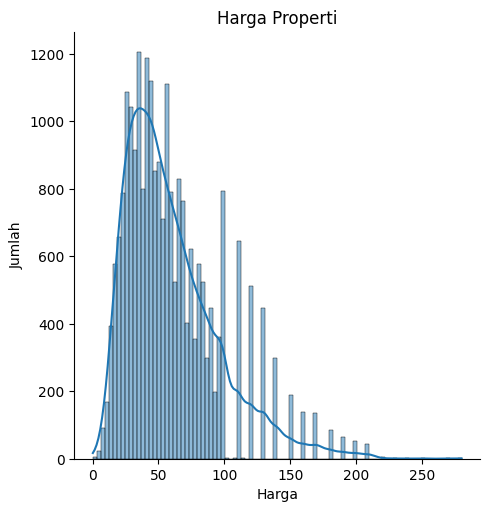

In [35]:
plt.figure(figsize=(20,20))
sns.displot(data['harga'], kde=True)
plt.title('Harga Properti')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
sns.despine()

<Figure size 2000x2000 with 0 Axes>

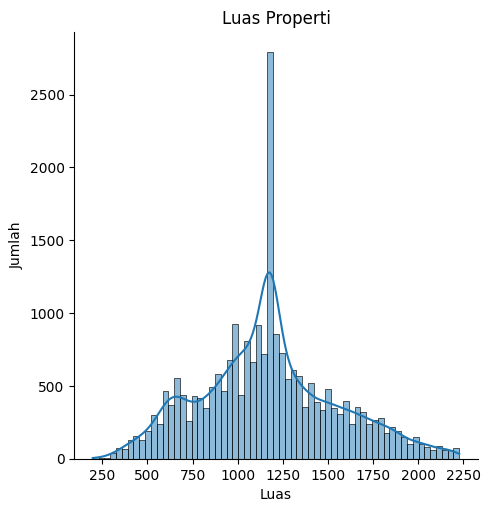

In [36]:
plt.figure(figsize=(20,20))
sns.displot(data['kaki_persegi'], kde=True)
plt.title('Luas Properti')
plt.xlabel('Luas')
plt.ylabel('Jumlah')
sns.despine()

<Figure size 2000x2000 with 0 Axes>

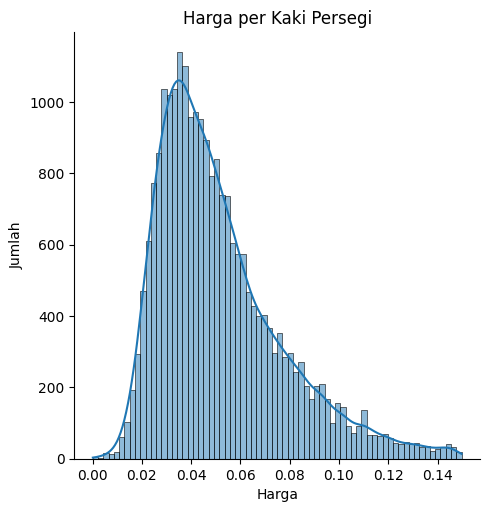

In [37]:
plt.figure(figsize=(20,20))
sns.displot(data['harga_per_kaki_persegi'], kde=True)
plt.title('Harga per Kaki Persegi')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
sns.despine()

<Figure size 2000x2000 with 0 Axes>

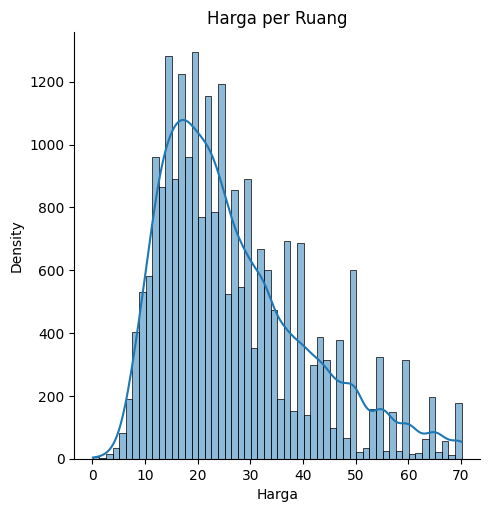

In [38]:
plt.figure(figsize=(20,20))
sns.displot(data['harga_per_ruang'], kde=True)
plt.title('Harga per Ruang')
plt.xlabel('Harga')
plt.ylabel('Density')
sns.despine()

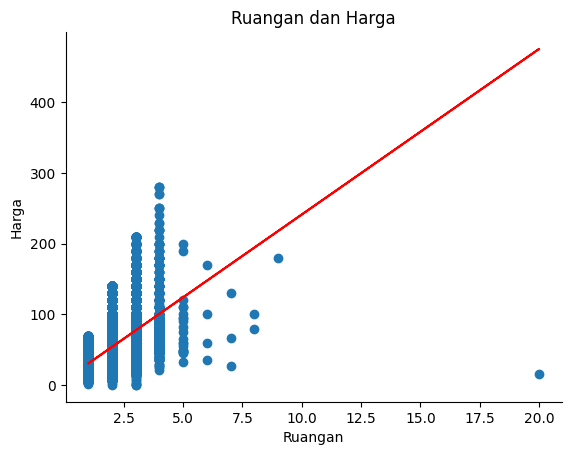

In [39]:
plt.scatter(data['total_ruangan'], data['harga'])
plt.title('Ruangan dan Harga')
plt.xlabel('Ruangan')
plt.ylabel('Harga')

z = np.polyfit(data['total_ruangan'], data['harga'], 1)
p = np.poly1d(z)
plt.plot(data['total_ruangan'], p(data['total_ruangan']), color='red')

sns.despine()

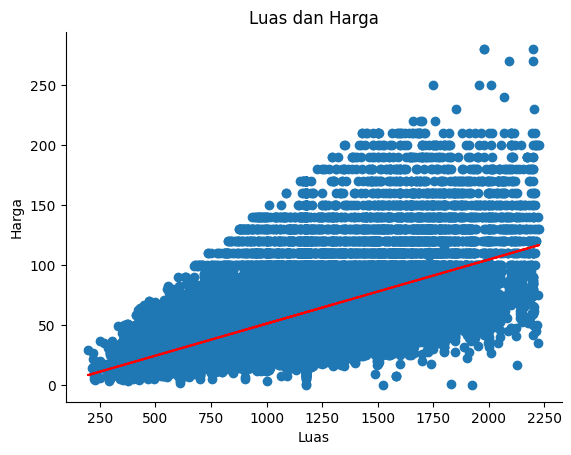

In [40]:
plt.scatter(data['kaki_persegi'], data['harga'])
plt.title('Luas dan Harga')
plt.xlabel('Luas')
plt.ylabel('Harga')

z = np.polyfit(data['kaki_persegi'], data['harga'], 1)
p = np.poly1d(z)
plt.plot(data['kaki_persegi'], p(data['kaki_persegi']), color='red')

sns.despine()

In [41]:
data.to_csv('dataset_harga_rumah_cleaned.csv')